# The Project

In this project, my goal is replicated an analyses I use to perform to evaluate NPS answers. When I received responses from clients, I labeled them as `Positive`, `Negative`, or `Neutral` labels, and then sent the Negative responses to the responsible parties to take the necessary actions.

Since I can`t to share the real data that I follow in my daily work, I found a dataset with some tweets and will apply the same concept to this dataset.

It's important to note that I label and send the issues to the responsable parties to enable quick actions, but I also need to read all the comments. This is just a part of the process.

# About Dataset

The Social Media Sentiments Analysis Dataset captures a vibrant tapestry of emotions, trends, and interactions across various social media platforms. This dataset provides a snapshot of user-generated content, encompassing text, timestamps, hashtags, countries, likes, and retweets. Each entry unveils unique stories—moments of surprise, excitement, admiration, thrill, contentment, and more—shared by individuals worldwide.

## Key Features

- **Text**:	User-generated content showcasing sentiments
- **Sentiment**: Categorized emotions
- **Timestamp**:	Date and time information
- **User**:	Unique identifiers of users contributing
- **Platform**:	Social media platform where the content originated
- **Hashtags**:	Identifies trending topics and themes
- **Likes**:	Quantifies user engagement (likes)
- **Retweets**:	Reflects content popularity (retweets)
- **Country**:	Geographical origin of each post
- **Year**:	Year of the post
- **Month**:	Month of the post
- **Day**:	Day of the post
- **Hour**:	Hour of the post

## Libraries and Data

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
import random

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from collections import Counter

import nltk
nltk.download('punkt')
nltk.download('stopwords')


warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mateu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mateu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [209]:
# Auxiliary Functions
random.seed(42)

# Calculate the proportion

def calculate_prop(data, column):
    '''
    Calcula a proporcao para as variaveis categoricas.


    '''
    tmp = data[column].value_counts().reset_index(name='amount')
    tmp['prop'] = tmp['amount'] / tmp['amount'].sum() * 100
    return tmp



# Relabeling the data

def relabel_sentiments(sentiment):
    '''
    Criar uma nova classificacao para os tweets.
    '''

    positive = ['Positive', 'Happiness', 'Joy', 'Love', 'Amusement', 'Enjoyment', 'Admiration', 'Affection', 'Awe', 'Surprise', 
                'Acceptance', 'Adoration', 'Anticipation', 'Excitement', 'Kindness', 'Pride', 'Elation', 'Euphoria', 
                'Contentment', 'Serenity', 'Gratitude', 'Hope', 'Empowerment', 'Compassion', 'Tenderness', 'Arousal', 
                'Enthusiasm', 'Fulfillment', 'Reverence', 'Determination', 'Zest', 'Hopeful', 'Proud', 'Grateful', 
                'Empathetic', 'Compassionate', 'Playful', 'Free-spirited', 'Inspired', 'Confident', 'Inspiration', 
                'Motivation', 'Joyful', 'Satisfaction', 'Blessed', 'Accomplishment', 'Optimism', 'Elation', 'Wonder', 
                'Radiance', 'Rejuvenation', 'Cozy', 'Adventure', 'Melodic', 'Festive', 'Freedom', 'Dazzle', 'Artistic', 
                'Culinary', 'Marvel', 'Spark', 'Thrill', 'Harmony', 'Creativity', 'Reflective', 'Awe', 'Amazement', 
                'Romance', 'Captivation', 'Tranquility', 'Grandeur', 'Emotion', 'Energy', 'Celebration', 'Charm', 
                'Ecstasy', 'Connection', 'Iconic', 'Journey', 'Engagement', 'Touched', 'Triumph', 'Heartwarming', 
                'Enchantment', 'Exploration', 'Success']
    
    negative = ['Negative', 'Anger', 'Fear', 'Sadness', 'Disgust', 'Disappointed', 'Bitter', 'Confusion', 'Shame', 
                'Despair', 'Grief', 'Loneliness', 'Jealousy', 'Resentment', 'Frustration', 'Boredom', 'Anxiety', 
                'Intimidation', 'Helplessness', 'Envy', 'Melancholy', 'Ambivalence', 'Yearning', 'Fearful', 'Apprehensive', 
                'Overwhelmed', 'Devastated', 'Dismissive', 'Bittersweet', 'Disappointment', 'Regret', 'Suffering', 
                'Isolation', 'LostLove', 'Exhaustion', 'Sorrow', 'Darkness', 'Desperation', 'Ruins', 'Desolation', 
                'Betrayal', 'Heartache', 'Solitude', 'Heartbreak', 'Hate', 'Bad', 'Miscalculation', 'Challenge', 
                'Obstacle', 'Sympathy', 'Pressure']
    
    neutral = ['Neutral', 'Calmness', 'Numbness', 'Reflection', 'Contemplation', 'Serenity', 'Mindfulness', 'Pensive', 
               'Acceptance', 'Indifference', 'Relief']
    
    sentiment = sentiment.strip()
    if sentiment in positive:
        return 'Positive'
    elif sentiment in negative:
        return 'Negative'
    elif sentiment in neutral:
        return 'Neutral'
    else:
        return 'Other'
    


stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean(text):
    ''' 
    Limpeza e padronizacao do texto
    '''
    text = str(text).lower()
    text = re.sub(r'\[.*?\]', '', text) # remove text in brackets
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[{}]'.format(re.escape(string.punctuation)), '', text)  # Remove punctuation
    text = re.sub(r'\n', ' ', text)  # Replace newlines with space
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # Remove non-ASCII characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace and strip leading/trailing spaces
    
    tokens = word_tokenize(text)
    cleaned_tokens = [stemmer.stem(token) for token in tokens if token not in stop_words]
    cleaned_text = ' '.join(cleaned_tokens)
    
    return cleaned_text



def test_means_difference(data, value_col, group_col):
    """
    Testa se as médias de diferentes grupos são significativamente diferentes.
    
    Args:
    data (pd.DataFrame): DataFrame contendo os dados.
    value_col (str): Nome da coluna com os valores a serem testados.
    group_col (str): Nome da coluna com os grupos.
    
    Returns:
    dict: Dicionário com os resultados do teste.
    """
    # Testar a normalidade dos dados
    grouped = data.groupby(group_col)[value_col]
    normality_p_values = {group: stats.shapiro(values)[1] for group, values in grouped}

    # Verificar se todos os grupos são normais
    all_normal = all(p > 0.05 for p in normality_p_values.values())

    print("Normalidade dos dados:")
    for group, p_value in normality_p_values.items():
        print(f"{group}: p-value = {p_value:.4f}")

    if all_normal:
        # Dados normais, usar ANOVA
        groups = [values for name, values in grouped]
        f_val, p_val = stats.f_oneway(*groups)
        test_name = 'ANOVA'
    else:
        # Dados não normais, usar Kruskal-Wallis
        groups = [values for name, values in grouped]
        f_val, p_val = stats.kruskal(*groups)
        test_name = 'Kruskal-Wallis'

    print(f"\nResultado do teste ({test_name}):")
    print(f"Estatística do teste: {f_val:.4f}")
    print(f"p-valor: {p_val:.4f}")

    conclusion = "As médias dos grupos são significativamente diferentes." if p_val < 0.05 else "Não há diferença significativa entre as médias dos grupos."

    print("Conclusão:", conclusion)

    return {
        "test_name": test_name,
        "test_statistic": f_val,
        "p_value": p_val,
        "conclusion": conclusion
    }



In [210]:
# Data

data = pd.read_csv('D:/OneDrive/PROJETOS_R_GIT/2024/SOCIA_MEDIA_POSTS/DATA/sentimentdataset.csv')

## Data Understanding

In [211]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [212]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [213]:
print(f'The data has {data.shape[0]} rows and {data.shape[1]} columns.')

The data has 732 rows and 15 columns.


In [214]:
data.isna().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [215]:
# Checking the unique values
data_unique = data.nunique().reset_index(name = 'col')
data_unique['prop'] = data_unique['col']/data.shape[0]*100
data_unique

,index,col,prop
0,Unnamed: 0.1,732,100.000000
1,Unnamed: 0,732,100.000000
2,Text,707,96.584699
3,Sentiment,279,38.114754
4,Timestamp,683,93.306011
5,User,685,93.579235
6,Platform,4,0.546448
7,Hashtags,697,95.218579
8,Retweets,26,3.551913
9,Likes,38,5.191257


- The first two columns are likely an ID or a position code. I will drop them.
- The 'Text' column shows that we have 3-4% of duplicate messages.
- There are 279 class for the sentiment.

In [216]:
# Removing the Unnamed columns

col_names = data.columns
col_names = [col for col in col_names if col not in ['Unnamed: 0.1', 'Unnamed: 0']]

data_tmp = data[col_names].copy()

In [217]:
data_tmp.head()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [218]:
# Removing the duplicated rows

data_tmp.drop_duplicates()

,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
727,Collaborating on a science project that receiv...,Happy,2017-08-18 18:20:00,ScienceProjectSuccessHighSchool,Facebook,#ScienceFairWinner #HighSchoolScience,20.0,39.0,UK,2017,8,18,18
728,Attending a surprise birthday party organized ...,Happy,2018-06-22 14:15:00,BirthdayPartyJoyHighSchool,Instagram,#SurpriseCelebration #HighSchoolFriendship,25.0,48.0,USA,2018,6,22,14
729,Successfully fundraising for a school charity ...,Happy,2019-04-05 17:30:00,CharityFundraisingTriumphHighSchool,Twitter,#CommunityGiving #HighSchoolPhilanthropy,22.0,42.0,Canada,2019,4,5,17
730,"Participating in a multicultural festival, cel...",Happy,2020-02-29 20:45:00,MulticulturalFestivalJoyHighSchool,Facebook,#CulturalCelebration #HighSchoolUnity,21.0,43.0,UK,2020,2,29,20


# Exploratory Data Analysis

## Univariate Analysis

In [219]:
# Column: Sentiment

calculate_prop(data_tmp, 'Sentiment')

,Sentiment,amount,prop
0,Positive,44,6.010929
1,Joy,42,5.737705
2,Excitement,32,4.371585
3,Neutral,14,1.912568
4,Contentment,14,1.912568
...,...,...,...
274,Adrenaline,1,0.136612
275,Harmony,1,0.136612
276,ArtisticBurst,1,0.136612
277,Radiance,1,0.136612


In [220]:
data_tmp['Sentiment'].unique()

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

- There are so many labels in the 'Sentiment' (280 labels) column that I decided to relabel the information into 3/4 classes.
- Relabeling this information into fewer classes can help simplify the analysis and make it more manageable.
- For the relabeling, I decided to create the groups myself, but it is important to mention that there are some libraries that analyze the data and classify it into groups, like `nltk`.

In [221]:
# Applying the relabeling

data_tmp['Relabeled_Sentiment'] = data_tmp['Sentiment'].apply(relabel_sentiments)
sentiment_table = data_tmp['Relabeled_Sentiment'].value_counts().reset_index(name = 'count')
sentiment_table['prop'] = round(sentiment_table['count']/sentiment_table['count'].sum() * 100,2)
sentiment_table

,Relabeled_Sentiment,count,prop
0,Positive,401,54.78
1,Negative,163,22.27
2,Other,125,17.08
3,Neutral,43,5.87


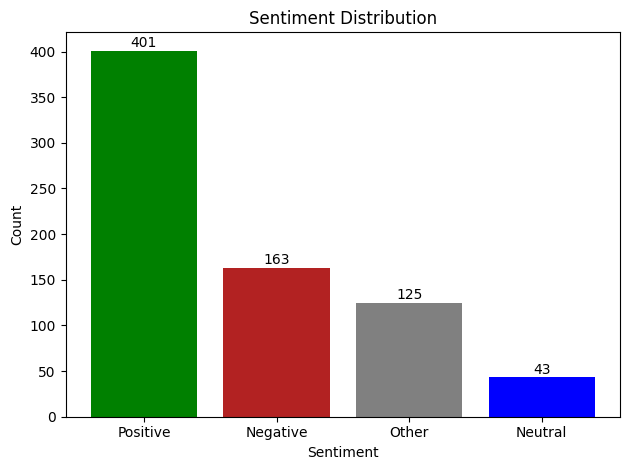

In [222]:
# Plotting the groups

colors = {
    'Positive' : 'green',
    'Negative' : 'firebrick',
    'Neutral' : 'blue',
    'Other' : 'grey'
}

plt.bar(sentiment_table['Relabeled_Sentiment'], sentiment_table['count'],
        color = [colors[label] for label in sentiment_table['Relabeled_Sentiment']]
        )

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')

for i, count in enumerate(sentiment_table['count']):
    plt.text(i, count + 1, str(count), ha = 'center', va = 'bottom')

plt.tight_layout()
plt.show()

- The most number of tweets are positive (55%), followed by negative (22%) and others (17%).
- These classes are unbalanced.

In [223]:
# Timestamp
data_tmp['Timestamp'] = pd.to_datetime(data_tmp['Timestamp'])
data_tmp['Timestamp'].describe()

count                              732
mean     2020-12-08 21:37:38.196721408
min                2010-05-15 15:30:00
25%                2019-03-08 17:27:30
50%                2021-09-20 14:30:00
75%                2023-02-26 11:48:45
max                2023-10-22 20:45:00
Name: Timestamp, dtype: object

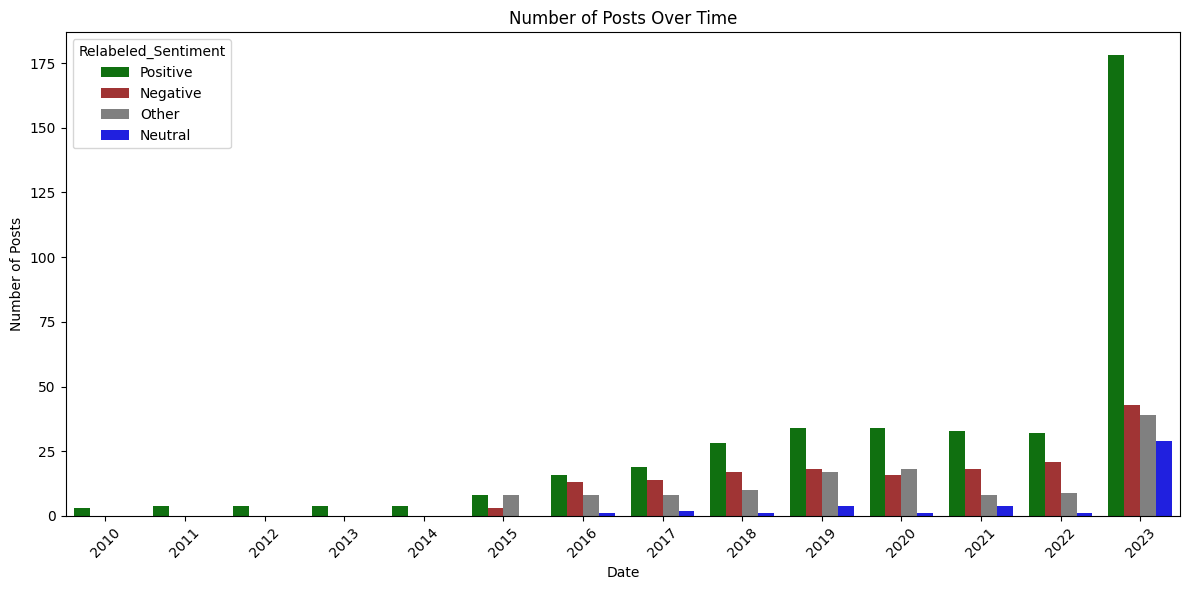

In [224]:
# Year 

# Plotting the time series
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Year', hue = 'Relabeled_Sentiment', data = data_tmp, palette=colors)

# Adding labels and title
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.title('Number of Posts Over Time')

# Rotating date labels for better readability
plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [225]:
res_year = data_tmp['Year'].value_counts().reset_index(name = 'count')
res_year['prop'] = res_year['count']/res_year['count'].sum() * 100
res_year.sort_values('Year')

,Year,count,prop
13,2010,3,0.409836
9,2011,4,0.546448
10,2012,4,0.546448
11,2013,4,0.546448
12,2014,4,0.546448
8,2015,19,2.595628
7,2016,38,5.191257
6,2017,43,5.874317
5,2018,56,7.650273
1,2019,73,9.972678


In [226]:
print(f" There are {len(data_tmp[data_tmp['Year'] < 2015])} tweets before 2015")

 There are 19 tweets before 2015


- The data is from 2010 to 2023.
- 40% of the tweets are from the year 2023.
- Initially, I won't consider this variable Year.

In [227]:
# Users
print(f"There are {data_tmp['User'].nunique()} unique users and it represents {round(data_tmp['User'].nunique()/data_tmp['User'].shape[0]*100,2)}%.")

There are 685 unique users and it represents 93.58%.


In [228]:
users_qtde = data_tmp['User'].value_counts().reset_index(name = 'count')
users_qtde['prop'] = users_qtde['count']/users_qtde['count'].sum()*100
users_qtde.sort_values('count', ascending = False)
users_qtde.describe()

,count,prop
count,685.000000,685.000000
mean,1.068613,0.145985
std,0.285557,0.039010
min,1.000000,0.136612
25%,1.000000,0.136612
50%,1.000000,0.136612
75%,1.000000,0.136612
max,3.000000,0.409836


- 75% of the users have just one tweet.
- The mean is 1.06 and the standard deviation is 0.28.

In [229]:
# Platform

calculate_prop(data_tmp, 'Platform')

,Platform,amount,prop
0,Instagram,258,35.245902
1,Facebook,231,31.557377
2,Twitter,128,17.486339
3,Twitter,115,15.710383


In [230]:
# Adjusting the words
data_tmp['Platform'] = data_tmp['Platform'].str.strip().replace('Twitter', 'Twitter')

In [231]:
calculate_prop(data_tmp, 'Platform')

,Platform,amount,prop
0,Instagram,258,35.245902
1,Twitter,243,33.196721
2,Facebook,231,31.557377


In [232]:
# Hashtags

hashtags = data_tmp['Hashtags'].reset_index()
hashtags = hashtags['Hashtags'].str.split(expand = True)
hashtags.columns = ['col1', 'col2']
stacked_hashtags = hashtags.stack().reset_index(level=1, drop=True).reset_index(name='Hashtag')
stacked_hashtags

,index,Hashtag
0,0,#Nature
1,0,#Park
2,1,#Traffic
3,1,#Morning
4,2,#Fitness
...,...,...
1459,729,#HighSchoolPhilanthropy
1460,730,#CulturalCelebration
1461,730,#HighSchoolUnity
1462,731,#VirtualEntertainment


In [233]:
# How many different hashtags?

print(f" There are {stacked_hashtags['Hashtag'].nunique()} different hastags")

 There are 975 different hastags


In [234]:
data_tmp['Hashtags'] = data_tmp['Hashtags'].str.replace(r'#', '', regex = True)
data_tmp['Hashtags'] = data_tmp['Hashtags'].str.lower()

In [235]:
calculate_prop(stacked_hashtags, 'Hashtag')

,Hashtag,amount,prop
0,#Serenity,15,1.024590
1,#Excitement,13,0.887978
2,#Gratitude,13,0.887978
3,#Despair,11,0.751366
4,#Nostalgia,11,0.751366
...,...,...,...
970,#CulturalExperience,1,0.068306
971,#Confidence,1,0.068306
972,#OvercomingAnxiety,1,0.068306
973,#FitnessSuccess,1,0.068306


In [236]:
# Countries

countries = calculate_prop(data_tmp, 'Country')
countries

,Country,amount,prop
0,USA,59,8.060109
1,USA,55,7.513661
2,UK,49,6.693989
3,Canada,44,6.010929
4,Australia,41,5.601093
...,...,...,...
110,Netherlands,1,0.136612
111,USA,1,0.136612
112,Germany,1,0.136612
113,France,1,0.136612


- The names need to be standardized.

In [237]:
data_tmp['Country'] = data_tmp['Country'].str.strip().str.lower().str.replace(" ", "")

In [238]:
countries = calculate_prop(data_tmp, 'Country')
countries.head(8)

,Country,amount,prop
0,usa,188,25.683060
1,uk,143,19.535519
2,canada,135,18.442623
3,australia,75,10.245902
4,india,70,9.562842
5,brazil,17,2.322404
6,france,16,2.185792
7,japan,15,2.049180


- After the treatments, there are 33 countries.
- USA, UK and Canada represent more the 50% of the texts

In [239]:
# Text

# Most commom words

data_tmp['cleaned_text'] = data_tmp['Text'].apply(clean)

In [240]:
data_tmp['temp_list'] = data_tmp['cleaned_text'].apply(lambda x: str(x).split())
top_words = Counter([item for sublist in data_tmp['temp_list'] for item in sublist])

top_words_df = pd.DataFrame(top_words.most_common(20), columns=['Common_words', 'count'])

top_words_df

,Common_words,count
0,new,43
1,life,37
2,challeng,34
3,joy,31
4,danc,30
5,day,29
6,feel,29
7,like,28
8,dream,28
9,moment,27


In [241]:
# Positive words

top = Counter([item for sublist in data_tmp[data_tmp['Relabeled_Sentiment'] == 'Positive']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive

,Common_words,count
0,new,29
1,challeng,23
2,joy,23
3,life,21
4,seren,20
5,danc,20
6,beauti,19
7,friend,18
8,laughter,18
9,embrac,18


In [242]:
# Negative words

top = Counter([item for sublist in data_tmp[data_tmp['Relabeled_Sentiment'] == 'Negative']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive

,Common_words,count
0,echo,19
1,despair,13
2,emot,13
3,heart,11
4,lost,11
5,shatter,11
6,thought,10
7,feel,9
8,loneli,9
9,like,9


In [243]:
# Neutral words

top = Counter([item for sublist in data_tmp[data_tmp['Relabeled_Sentiment'] == 'Neutral']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive

,Common_words,count
0,life,8
1,new,6
2,day,6
3,numb,6
4,emot,6
5,indiffer,5
6,shield,5
7,experi,5
8,school,5
9,attend,4


In [244]:
# Other words

top = Counter([item for sublist in data_tmp[data_tmp['Relabeled_Sentiment'] == 'Other']['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(10), columns=['Common_words', 'count'])
temp_positive

,Common_words,count
0,curios,10
1,explor,10
2,nostalgia,9
3,like,9
4,art,9
5,old,8
6,bitter,8
7,new,7
8,world,7
9,joy,7


## Bivariate | Multiavariate Analysis

In [245]:
platform_sentiment = data_tmp.groupby(['Platform','Relabeled_Sentiment']).size().reset_index(name='Count')
df = platform_sentiment.pivot_table(index = 'Platform', columns = 'Relabeled_Sentiment', values = 'Count')

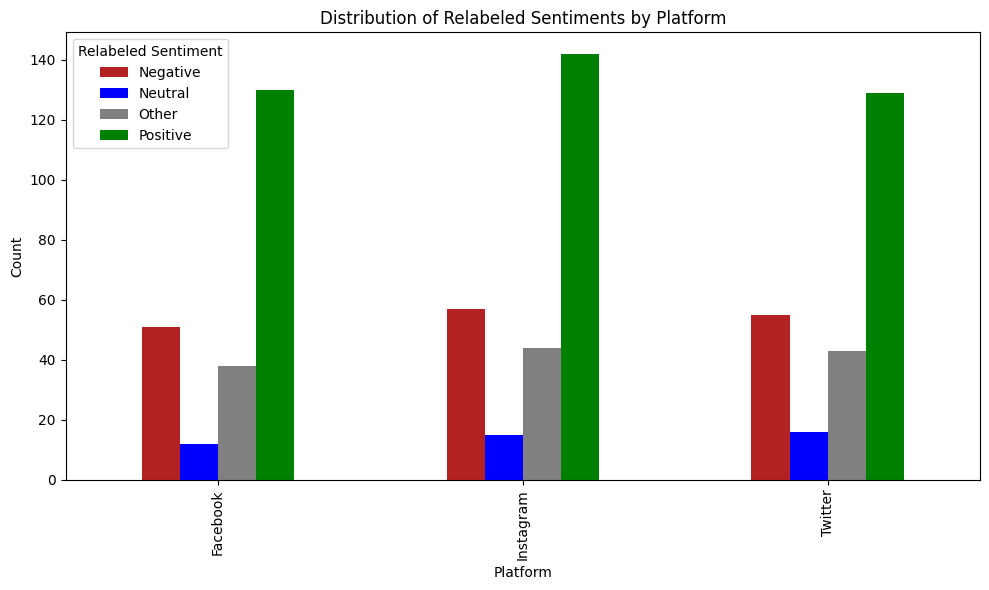

In [246]:
colors = {
    'Positive': 'green',
    'Negative': 'firebrick',
    'Neutral': 'blue',
    'Other':'grey'
}

df.plot(kind='bar', stacked=False, figsize=(10, 6), color = colors)

# Adicionar títulos e rótulos
plt.title('Distribution of Relabeled Sentiments by Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.legend(title='Relabeled Sentiment')

# Mostrar o gráfico
plt.tight_layout()
plt.show()

In [247]:
platform_sentiment = data_tmp.groupby(['Country','Relabeled_Sentiment']).size().reset_index(name='Count')
df = platform_sentiment.pivot_table(index = 'Country', columns = 'Relabeled_Sentiment', values = 'Count', fill_value = 0)
df = df.div(df.sum(axis=0), axis=1)*100
df

Relabeled_Sentiment,Negative,Neutral,Other,Positive
Country,,,,
australia,13.496933,9.302326,7.2,9.975062
austria,0.000000,0.000000,0.0,0.498753
belgium,0.000000,0.000000,0.8,0.249377
brazil,3.680982,0.000000,0.8,2.493766
cambodia,0.000000,0.000000,0.0,0.249377
canada,19.631902,23.255814,14.4,18.703242
china,0.000000,0.000000,0.0,0.249377
colombia,0.000000,0.000000,0.8,0.000000
czechrepublic,0.000000,0.000000,0.0,0.498753


In [248]:
platform_sentiment = data_tmp.groupby(['Country','Relabeled_Sentiment']).size().reset_index(name='Count')
df = platform_sentiment.pivot_table(index = 'Country', columns = 'Relabeled_Sentiment', values = 'Count', fill_value = 0)
df = df.div(df.sum(axis=1), axis=0)*100
df.sort_values('Negative', ascending = False)

Relabeled_Sentiment,Negative,Neutral,Other,Positive
Country,,,,
spain,66.666667,0.000000,0.000000,33.333333
germany,35.714286,7.142857,21.428571,35.714286
brazil,35.294118,0.000000,5.882353,58.823529
southafrica,33.333333,0.000000,16.666667,50.000000
france,31.250000,6.250000,31.250000,31.250000
australia,29.333333,5.333333,12.000000,53.333333
india,27.142857,8.571429,15.714286,48.571429
japan,26.666667,0.000000,33.333333,40.000000
netherlands,25.000000,0.000000,0.000000,75.000000


,Retweets,Likes
Retweets,1.000000,0.998482
Likes,0.998482,1.000000


[]

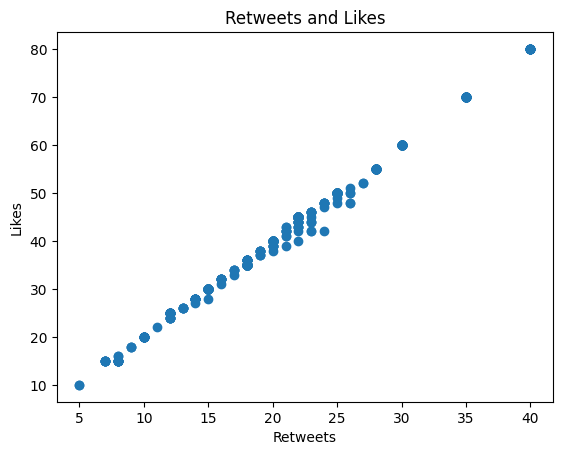

In [249]:
# Retweets and Likes

display(data_tmp[['Retweets', 'Likes']].corr())

plt.scatter(data_tmp['Retweets'], data_tmp['Likes'])
plt.title('Retweets and Likes')
plt.xlabel('Retweets')
plt.ylabel('Likes')

plt.plot()

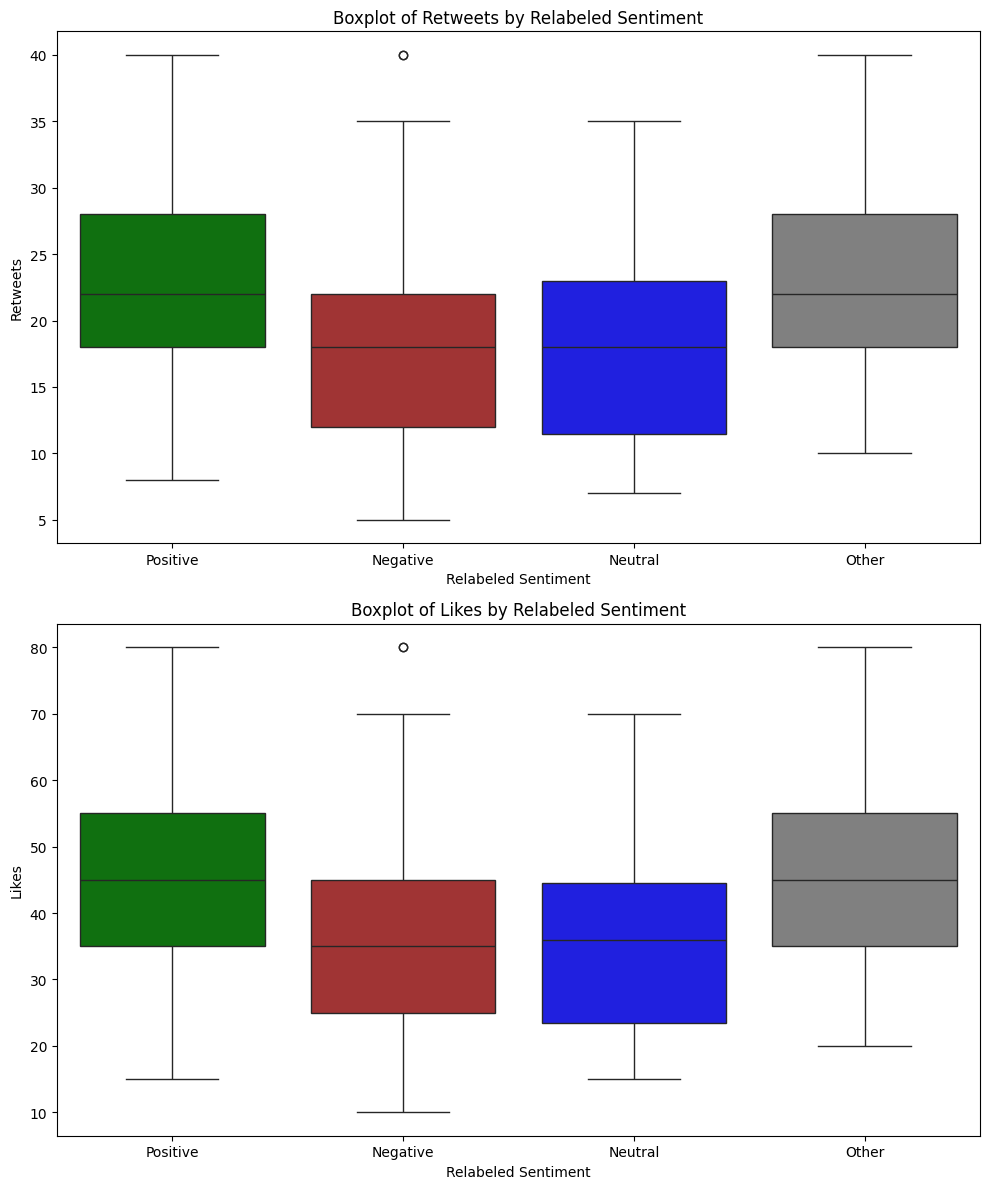

In [250]:
colors = {
    'Positive': 'green',
    'Negative': 'firebrick',
    'Neutral': 'blue',
    'Other': 'grey'
}

# Criar subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Boxplot para Retweets por Relabeled_Sentiment
sns.boxplot(x='Relabeled_Sentiment', y='Retweets', data=data_tmp, ax=axes[0], palette=colors)
axes[0].set_title('Boxplot of Retweets by Relabeled Sentiment')
axes[0].set_xlabel('Relabeled Sentiment')
axes[0].set_ylabel('Retweets')

# Boxplot para Likes por Relabeled_Sentiment
sns.boxplot(x='Relabeled_Sentiment', y='Likes', data=data_tmp, ax=axes[1], palette=colors)
axes[1].set_title('Boxplot of Likes by Relabeled Sentiment')
axes[1].set_xlabel('Relabeled Sentiment')
axes[1].set_ylabel('Likes')

# Ajustar layout
plt.tight_layout()
plt.show()

In [251]:
test_means_difference(data_tmp, 'Retweets', 'Relabeled_Sentiment')

Normalidade dos dados:
Negative: p-value = 0.0005
Neutral: p-value = 0.1062
Other: p-value = 0.0009
Positive: p-value = 0.0000

Resultado do teste (Kruskal-Wallis):
Estatística do teste: 65.6708
p-valor: 0.0000
Conclusão: As médias dos grupos são significativamente diferentes.


{'test_name': 'Kruskal-Wallis',
 'test_statistic': 65.67083050079088,
 'p_value': 3.6045830363625846e-14,
 'conclusion': 'As médias dos grupos são significativamente diferentes.'}

In [252]:
test_means_difference(data_tmp, 'Likes', 'Relabeled_Sentiment')

Normalidade dos dados:
Negative: p-value = 0.0004
Neutral: p-value = 0.1032
Other: p-value = 0.0018
Positive: p-value = 0.0000

Resultado do teste (Kruskal-Wallis):
Estatística do teste: 65.5831
p-valor: 0.0000
Conclusão: As médias dos grupos são significativamente diferentes.


{'test_name': 'Kruskal-Wallis',
 'test_statistic': 65.58307704738213,
 'p_value': 3.7638175581552795e-14,
 'conclusion': 'As médias dos grupos são significativamente diferentes.'}

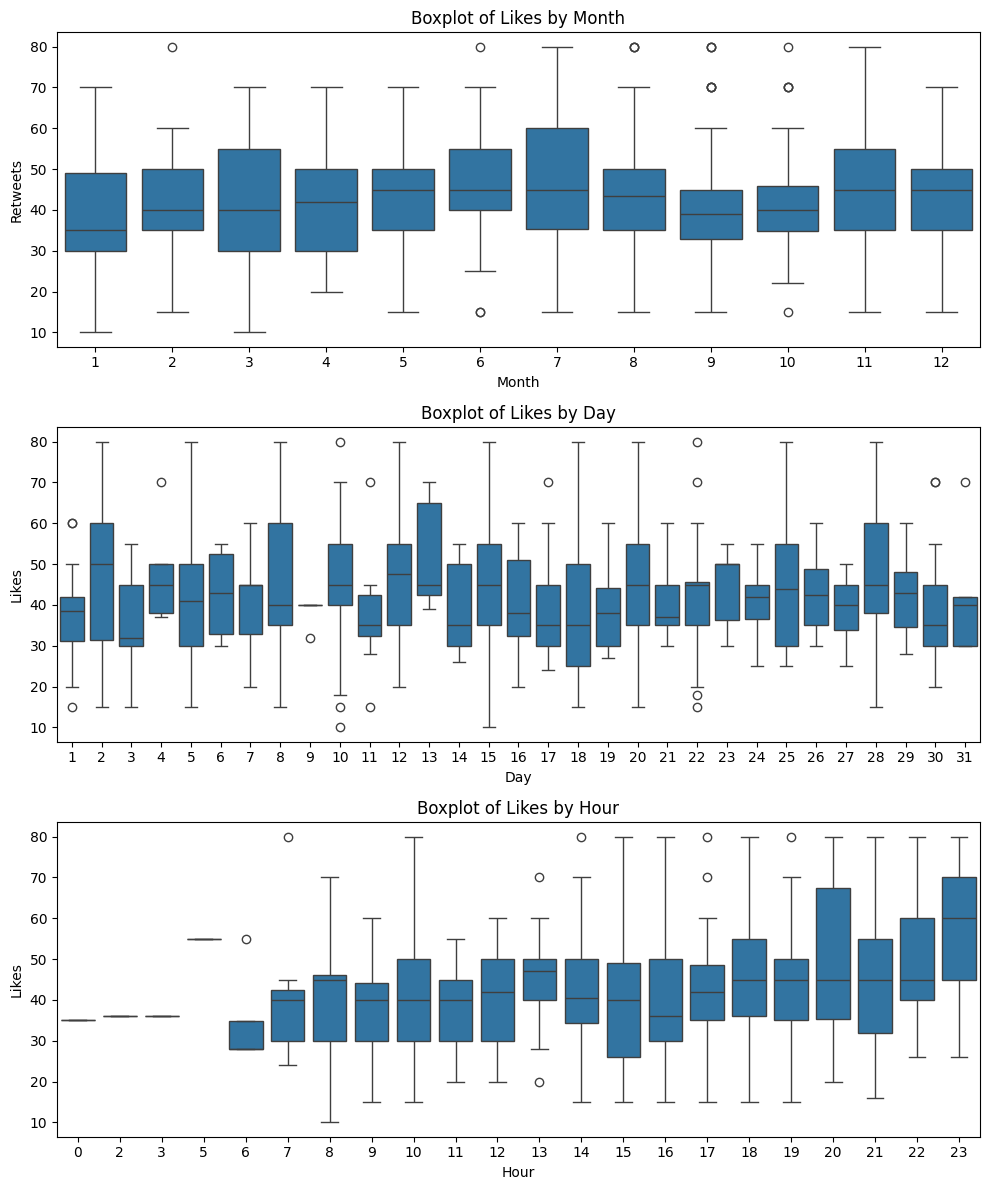

In [253]:
# Month

# Criar subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 12))

# Boxplot para Retweets por Relabeled_Sentiment
sns.boxplot(x='Month', y='Likes', data=data_tmp, ax=axes[0])
axes[0].set_title('Boxplot of Likes by Month')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Retweets')

# Boxplot para Likes por Relabeled_Sentiment
sns.boxplot(x='Day', y='Likes', data=data_tmp, ax=axes[1])
axes[1].set_title('Boxplot of Likes by Day')
axes[1].set_xlabel('Day')
axes[1].set_ylabel('Likes')

# Boxplot para Likes por Relabeled_Sentiment
sns.boxplot(x='Hour', y='Likes', data=data_tmp, ax=axes[2])
axes[2].set_title('Boxplot of Likes by Hour')
axes[2].set_xlabel('Hour')
axes[2].set_ylabel('Likes')


# Ajustar layout
plt.tight_layout()
plt.show()

## DATA PREPARATION

In [254]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import confusion_matrix
from scipy.sparse import hstack


from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

- It is important to notice that the variables Text and Hashtags were cleaned in the EDA process. This means that I removed the punctuation, converted the words to lowercase, and removed the stopwords.

In [255]:
data_text = data_tmp[['cleaned_text', 'Hashtags', 'Relabeled_Sentiment']].copy()

In [256]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(data_text[['cleaned_text', 'Hashtags']], data_text['Relabeled_Sentiment'], test_size=0.2, random_state=42)

In [257]:
# Feature extraction for text and hashtags
text_vectorizer = TfidfVectorizer(max_features=5000)
hashtag_vectorizer = TfidfVectorizer(max_features=1000)

In [258]:
X_train_text = text_vectorizer.fit_transform(X_train['cleaned_text'])
X_train_hashtags = hashtag_vectorizer.fit_transform(X_train['Hashtags'])

X_test_text = text_vectorizer.transform(X_test['cleaned_text'])
X_test_hashtags = hashtag_vectorizer.transform(X_test['Hashtags'])

# Combine features
X_train_combined = hstack([X_train_text, X_train_hashtags])
X_test_combined = hstack([X_test_text, X_test_hashtags])

## Logistic Regression

In [285]:
# Train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_combined, y_train)

# Evaluate the model
y_pred_log = model.predict(X_test_combined)
accuracy_logistic = accuracy_score(y_test, y_pred_log)
classification_rep_logistic = classification_report(y_test, y_pred_log, output_dict=True)
classification_rep_logistic1 = classification_report(y_test, y_pred_log)

In [286]:
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", classification_rep_logistic1)

Logistic Regression Results:
Accuracy: 0.7414965986394558
Classification Report:
               precision    recall  f1-score   support

    Negative       0.97      0.69      0.81        42
     Neutral       1.00      0.40      0.57         5
       Other       1.00      0.27      0.42        30
    Positive       0.65      1.00      0.79        70

    accuracy                           0.74       147
   macro avg       0.91      0.59      0.65       147
weighted avg       0.83      0.74      0.71       147



In [289]:
# Train the Logistic Regression model with class weight
model = LogisticRegression(max_iter=1000,class_weight='balanced')
model.fit(X_train_combined, y_train)

# Evaluate the model
y_pred_log = model.predict(X_test_combined)
accuracy_logistic_weight = accuracy_score(y_test, y_pred_log)
classification_rep_logistic_weight = classification_report(y_test, y_pred_log, output_dict=True)
classification_rep_logistic_weight1 = classification_report(y_test, y_pred_log)

In [290]:
print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_logistic}")
print("Classification Report:\n", classification_rep_logistic_weight1)

Logistic Regression Results:
Accuracy: 0.7414965986394558
Classification Report:
               precision    recall  f1-score   support

    Negative       0.97      0.81      0.88        42
     Neutral       0.80      0.80      0.80         5
       Other       0.93      0.43      0.59        30
    Positive       0.75      1.00      0.86        70

    accuracy                           0.82       147
   macro avg       0.86      0.76      0.78       147
weighted avg       0.85      0.82      0.81       147



## Naive Bayes

In [291]:
# Train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train_combined, y_train)

# Evaluate the model
y_pred_naiv = model.predict(X_test_combined)
accuracy_naive = accuracy_score(y_test, y_pred_naiv)
classification_rep_naive = classification_report(y_test, y_pred_naiv, output_dict=True)
classification_rep_naive1 = classification_report(y_test, y_pred_naiv)

In [292]:
print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_naive}")
print("Classification Report:\n", classification_rep_naive1)

Naive Bayes Results:
Accuracy: 0.7619047619047619
Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.76      0.83        42
     Neutral       1.00      0.20      0.33         5
       Other       1.00      0.30      0.46        30
    Positive       0.69      1.00      0.81        70

    accuracy                           0.76       147
   macro avg       0.90      0.57      0.61       147
weighted avg       0.83      0.76      0.73       147



## SVM

In [293]:
## SVM

# Train the SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_combined, y_train)

# Evaluate the SVM model
svm_y_pred = svm_model.predict(X_test_combined)
accuracy_svm = accuracy_score(y_test, svm_y_pred)
classification_rep_svm = classification_report(y_test, svm_y_pred, output_dict=True)
classification_rep_svm1 = classification_report(y_test, svm_y_pred)

In [294]:
print("SVM Results:")
print(f"Accuracy: {accuracy_svm}")
print("Classification Report:\n", classification_rep_svm1)

SVM Results:
Accuracy: 0.7959183673469388
Classification Report:
               precision    recall  f1-score   support

    Negative       0.97      0.81      0.88        42
     Neutral       0.75      0.60      0.67         5
       Other       1.00      0.33      0.50        30
    Positive       0.71      1.00      0.83        70

    accuracy                           0.80       147
   macro avg       0.86      0.69      0.72       147
weighted avg       0.85      0.80      0.77       147



In [295]:
## SVM balanced

# Train the SVM model
svm_model = SVC(kernel='linear', class_weight='balanced')
svm_model.fit(X_train_combined, y_train)

# Evaluate the SVM model
svm_bal_y_pred = svm_model.predict(X_test_combined)
accuracy_svm_bal = accuracy_score(y_test, svm_bal_y_pred)
classification_rep_svm_bal = classification_report(y_test, svm_bal_y_pred, output_dict=True)
classification_rep_svm_bal1 = classification_report(y_test, svm_bal_y_pred)

In [296]:
print("SVM Balanced Results:")
print(f"Accuracy: {accuracy_svm_bal}")
print("Classification Report:\n", classification_rep_svm_bal1)

SVM Balanced Results:
Accuracy: 0.7959183673469388
Classification Report:
               precision    recall  f1-score   support

    Negative       0.97      0.81      0.88        42
     Neutral       0.75      0.60      0.67         5
       Other       1.00      0.33      0.50        30
    Positive       0.71      1.00      0.83        70

    accuracy                           0.80       147
   macro avg       0.86      0.69      0.72       147
weighted avg       0.85      0.80      0.77       147



# Random Forest

In [297]:
# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_combined, y_train)

# Evaluate the Random Forest model
rf_y_pred = rf_model.predict(X_test_combined)
accuracy_rf = accuracy_score(y_test, rf_y_pred)
classification_rf = classification_report(y_test, svm_y_pred, output_dict=True)
classification_rf1 = classification_report(y_test, svm_y_pred)

In [298]:
print("Random Forest Results:")
print(f"Accuracy: {accuracy_rf}")
print("Classification Report:\n", classification_rf1)

Random Forest Results:
Accuracy: 0.7006802721088435
Classification Report:
               precision    recall  f1-score   support

    Negative       0.97      0.81      0.88        42
     Neutral       0.75      0.60      0.67         5
       Other       1.00      0.33      0.50        30
    Positive       0.71      1.00      0.83        70

    accuracy                           0.80       147
   macro avg       0.86      0.69      0.72       147
weighted avg       0.85      0.80      0.77       147



## Gradient Boosting

In [299]:
## Gradient Boosting

# Train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train_combined, y_train)

# Evaluate the Gradient Boosting model
gb_y_pred = gb_model.predict(X_test_combined)
accuracy_gb = accuracy_score(y_test, gb_y_pred)
classification_gb = classification_report(y_test, gb_y_pred, output_dict=True)
classification_gb1 = classification_report(y_test, gb_y_pred)

In [300]:
print("Gradient Boosting Results:")
print(f"Accuracy: {accuracy_gb}")
print("Classification Report:\n", classification_gb1)

Gradient Boosting Results:
Accuracy: 0.7006802721088435
Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.57      0.70        42
     Neutral       0.60      0.60      0.60         5
       Other       0.89      0.27      0.41        30
    Positive       0.64      0.97      0.77        70

    accuracy                           0.70       147
   macro avg       0.75      0.60      0.62       147
weighted avg       0.76      0.70      0.67       147



In [307]:
# Train the Gradient Boosting model with class weight adjustment
# Convert sparse matrices to dense arrays
X_train_combined_dense = X_train_combined.toarray()
X_test_combined_dense = X_test_combined.toarray()

# Train the Gradient Boosting model with class weight adjustment
gb_model = HistGradientBoostingClassifier(max_iter=100, class_weight='balanced')
gb_model.fit(X_train_combined_dense, y_train)

# Evaluate the Gradient Boosting model
gb_bal_y_pred = gb_model.predict(X_test_combined_dense)
accuracy_gb_bal = accuracy_score(y_test, gb_bal_y_pred)
classification_gb_bal = classification_report(y_test, gb_bal_y_pred, output_dict=True)
classification_gb_bal1 = classification_report(y_test, gb_bal_y_pred)

# Print evaluation results
print('Gradient Boosting Results:')
print(f'Accuracy: {accuracy_gb_bal:.2f}')
print(classification_gb_bal1)

Gradient Boosting Results:
Accuracy: 0.35
              precision    recall  f1-score   support

    Negative       0.32      0.79      0.45        42
     Neutral       0.19      0.80      0.31         5
       Other       0.00      0.00      0.00        30
    Positive       0.88      0.20      0.33        70

    accuracy                           0.35       147
   macro avg       0.35      0.45      0.27       147
weighted avg       0.51      0.35      0.29       147



## Comparing the models

In [308]:
# Logistic Regression Results
logistic_metrics = {
    "model": "Logistic Regression",
    "accuracy": accuracy_logistic,
    "precision": classification_rep_logistic["weighted avg"]["precision"],
    "recall": classification_rep_logistic["weighted avg"]["recall"],
    "f1_score": classification_rep_logistic["weighted avg"]["f1-score"]
}

# Logistic Regression with Class Weight Results
logistic_weight_metrics = {
    "model": "Logistic Regression with Class Weight",
    "accuracy": accuracy_logistic_weight,
    "precision": classification_rep_logistic_weight["weighted avg"]["precision"],
    "recall": classification_rep_logistic_weight["weighted avg"]["recall"],
    "f1_score": classification_rep_logistic_weight["weighted avg"]["f1-score"]
}

# Naive Bayes Results
naive_metrics = {
    "model": "Naive Bayes",
    "accuracy": accuracy_naive,
    "precision": classification_rep_naive["weighted avg"]["precision"],
    "recall": classification_rep_naive["weighted avg"]["recall"],
    "f1_score": classification_rep_naive["weighted avg"]["f1-score"]
}

# SVM Results
svm_metrics = {
    "model": "SVM",
    "accuracy": accuracy_svm,
    "precision": classification_rep_svm["weighted avg"]["precision"],
    "recall": classification_rep_svm["weighted avg"]["recall"],
    "f1_score": classification_rep_svm["weighted avg"]["f1-score"]
}

# SVM with Class Weight Results
svm_bal_metrics = {
    "model": "SVM with Class Weight",
    "accuracy": accuracy_svm_bal,
    "precision": classification_rep_svm_bal["weighted avg"]["precision"],
    "recall": classification_rep_svm_bal["weighted avg"]["recall"],
    "f1_score": classification_rep_svm_bal["weighted avg"]["f1-score"]
}

# Random Forest Results
rf_metrics = {
    "model": "Random Forest",
    "accuracy": accuracy_rf,
    "precision": classification_rf["weighted avg"]["precision"],
    "recall": classification_rf["weighted avg"]["recall"],
    "f1_score": classification_rf["weighted avg"]["f1-score"]
}

# Gradient Boosting Results
gb_metrics = {
    "model": "Gradient Boosting",
    "accuracy": accuracy_gb,
    "precision": classification_gb["weighted avg"]["precision"],
    "recall": classification_gb["weighted avg"]["recall"],
    "f1_score": classification_gb["weighted avg"]["f1-score"]
}

# Gradient Boosting Results
gb_metrics_weig = {
    "model": "Gradient Boosting with weight",
    "accuracy": accuracy_gb_bal,
    "precision": classification_gb_bal["weighted avg"]["precision"],
    "recall": classification_gb_bal["weighted avg"]["recall"],
    "f1_score": classification_gb_bal["weighted avg"]["f1-score"]
}


In [309]:
data = {
    "Model": [
        logistic_metrics["model"], logistic_weight_metrics["model"], naive_metrics["model"],
        svm_metrics["model"], svm_bal_metrics["model"], rf_metrics["model"], gb_metrics["model"], gb_metrics_weig["model"]
    ],
    "Accuracy": [
        logistic_metrics["accuracy"], logistic_weight_metrics["accuracy"], naive_metrics["accuracy"],
        svm_metrics["accuracy"], svm_bal_metrics["accuracy"], rf_metrics["accuracy"], gb_metrics["accuracy"], gb_metrics_weig["accuracy"]
    ],
    "Precision": [
        logistic_metrics["precision"], logistic_weight_metrics["precision"], naive_metrics["precision"],
        svm_metrics["precision"], svm_bal_metrics["precision"], rf_metrics["precision"], gb_metrics["precision"], gb_metrics_weig["precision"]
    ],
    "Recall": [
        logistic_metrics["recall"], logistic_weight_metrics["recall"], naive_metrics["recall"],
        svm_metrics["recall"], svm_bal_metrics["recall"], rf_metrics["recall"], gb_metrics["recall"], gb_metrics_weig["recall"]
    ],
    "F1 Score": [
        logistic_metrics["f1_score"], logistic_weight_metrics["f1_score"], naive_metrics["f1_score"],
        svm_metrics["f1_score"], svm_bal_metrics["f1_score"], rf_metrics["f1_score"], gb_metrics["f1_score"], gb_metrics_weig["f1_score"]
    ]
}

df = pd.DataFrame(data)


Model Comparison:


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.741497,0.825812,0.741497,0.712172
1,Logistic Regression with Class Weight,0.823129,0.852689,0.823129,0.809122
2,Naive Bayes,0.761905,0.826117,0.761905,0.730603
3,SVM,0.795918,0.847279,0.795918,0.773861
4,SVM with Class Weight,0.795918,0.847279,0.795918,0.773861
5,Random Forest,0.700680,0.847279,0.795918,0.773861
6,Gradient Boosting,0.700680,0.761263,0.700680,0.670857
7,Gradient Boosting with weight,0.346939,0.513805,0.346939,0.294663


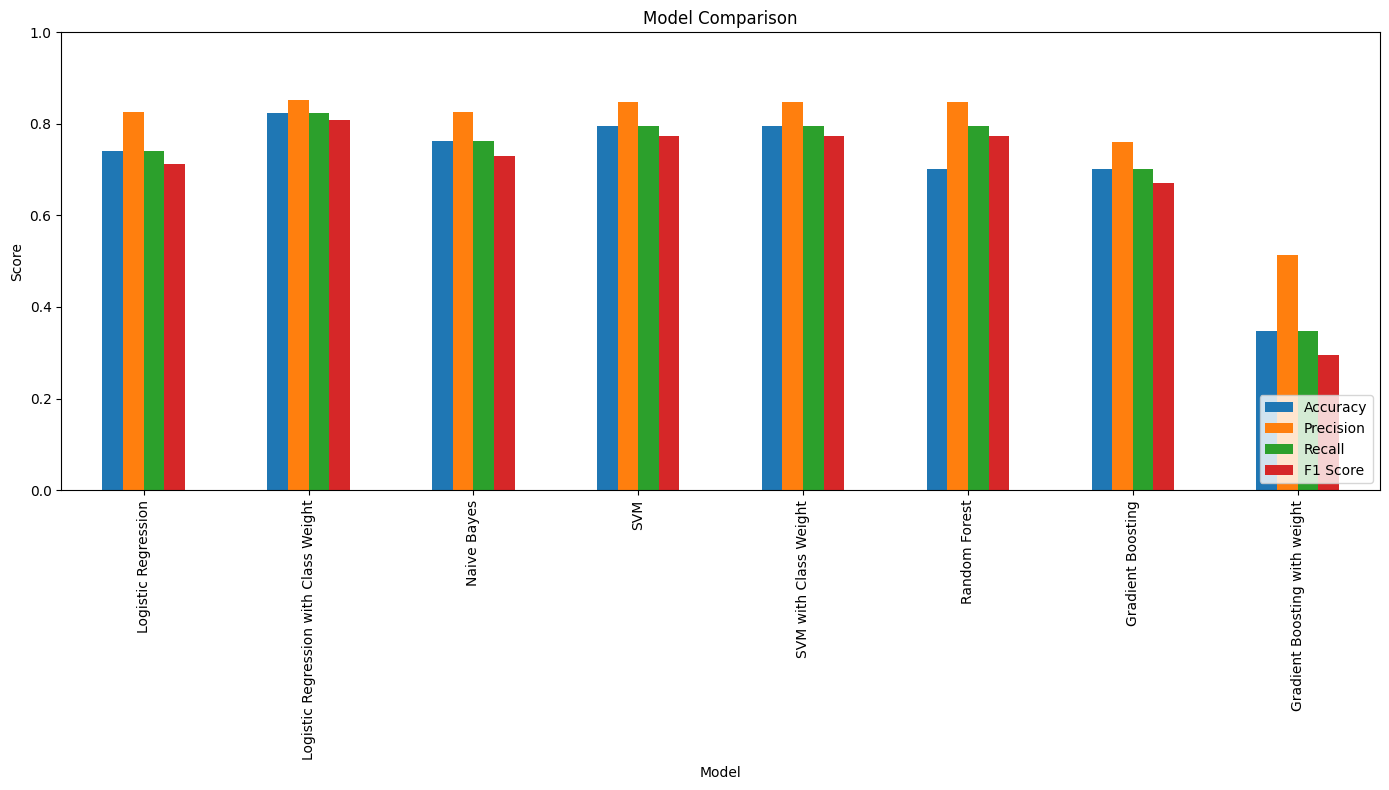

In [311]:
df = pd.DataFrame(data)

# Display the dataframe
print("Model Comparison:")
display(df)

# Plotting the metrics
df.set_index("Model", inplace=True)
df.plot(kind='bar', figsize=(14, 8))
plt.title("Model Comparison")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()